In [1]:
import pde
import numpy as np
import h5py

import matplotlib.pyplot as plt
from matplotlib import animation

from IPython.display import Video


In [111]:
filename = f'./Data/Simulations/FP_dwa.h5'
data = h5py.File(filename)

t = np.array(data['times'])
dt = t[1]-t[0]

x = np.array(data['x'])
dx = x[1]-x[0]

u = np.array(data['data'])
# u_dot = ps.FiniteDifference(axis=0)._differentiate(u, t=dt)

data.close()

barrier height 0.8555471400135367
max position -0.16000000000000003
delta V -0.3016988933062604


1.0063965866666669

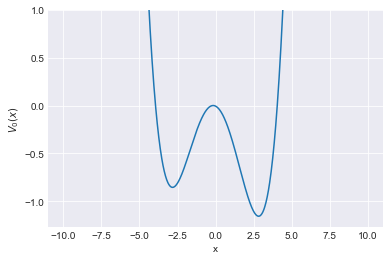

In [112]:
## POTENTIAL DEFINITION ##

## PARAMETERS

m = 1 # fixed 
w = 1 # fixed 
x_s = 2*np.sqrt(2) # local minima positions +/- , change to vary barrier length
d_c = m*w**2/(2*x_s) # critical value of d 
d = -0.01 # modulates maximum position and barrier height, negative values -> global minimun on the right 
# d = 0 symmetric d!=0 asymmetric

if (d <= -d_c or d >= d_c):
    # d must be lower in absolute value than the critical value
    raise ValueError()

C = m*w**2/(8*x_s**2)
x_u = d*(2*x_s**2/(m*w**2)) # maximum position
delta_V = 4*d*x_s**3/3 # between the two minima 



def V(x):
    return C*(x**2-x_s**2)**2 - d*(x**3/3-x_s**2*x)

def V0(x): # rescale potential so that Vmax is at zero
    return V(x)-V(x_u)

print('barrier height', V(x_u)-V(-x_s))
print('max position', x_u)
print('delta V', delta_V)

x = np.linspace(-10,10,1000)

plt.plot(x,V0(x))
plt.ylim(V0(x_s)*1.1, 1)
plt.xlabel('x')
plt.ylabel(r'$V_0(x)$')

V(x_u)

0.4504504504504503 -0.7076020887666943
delta V -0.3016964972575942
barrier_height 0.4277735000000001
V(x1) -0.8555470000000001


array([-0.68068553, -0.12404459,  0.14671844,  0.01434461, -0.05194725,
       -0.00068821,  0.00356478])

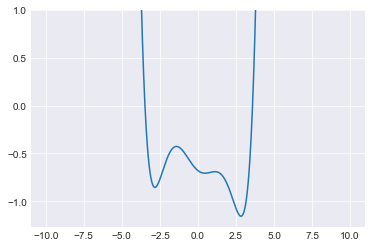

In [80]:
x1 = -2*np.sqrt(2)
x2 = -np.sqrt(2)
x4 =  1.1156 #1.4752617 symmetric , 1.1156 asymmetric (d=-0.01)
vbar = 20
scale = 0.4277735 # symmetric 0.5, asymmetric (d=-0.01) 0.4277735

def V(x):
    return ((x - x2)**2*(6*vbar*(12*x**3 - 20*x*x1**2 + 9*x**2*x2 - 10*x1**2*x2 + 6*x*x2**2 + 3*x2**3 - 5*(3*x**2 - 6*x1**2 + 2*x*x2 + x2**2)*x4) + (x - x1)**2*(x1 - x2)**3*(x**2*(8*x1**2 + 9*x1*x2 + 3*x2**2 - 5*(3*x1 + x2)*x4) + 2*x*(x1*(x1 + x2)*(5*x1 + 3*x2) - (3*x1 + x2)*(5*x1 + 2*x2)*x4 + 3*(3*x1 + x2)*x4**2) + x1*(5*x1**2*(x2 - 3*x4) + 4*x2*x4*(-2*x2 + 3*x4) + 3*x1*(x2**2 - 7*x2*x4 + 8*x4**2)))))/(6*(x1 - x2)**3*(8*x1**2 + 9*x1*x2 + 3*x2**2 - 5*(3*x1 + x2)*x4))

def V_scaled(x):
    return (scale/vbar * V(x)) -scale

x = np.linspace(-10,10,1000)

plt.plot(x,V_scaled(x))
plt.ylim(V_scaled(-x1)*1.1, 1)

x_min = x[(x>x2)&(x<x4)][np.argmin(V_scaled(x)[(x>x2) & (x<x4)])]

print(x_min, V_scaled(x_min))
print('delta V', V_scaled(-x1)-V_scaled(x1))
print('barrier_height', V_scaled(x2)-V_scaled(x1))
print('V(x1)', V_scaled(x1))

pot2 = V_scaled(x)
np.polynomial.polynomial.polyfit(x, V_scaled(x), 6) 

In [48]:
plt.style.use('seaborn-darkgrid')

In [49]:
from tqdm.notebook import tqdm

def my_pbar(curr_frame, tot_frame):
    pbar.update(100*curr_frame/tot_frame)

In [93]:
len(t)/1000

1000.0

In [113]:
%matplotlib nbagg



fig,ax = plt.subplots(figsize=(8,4.5))

ax.set_xlabel('x')
ax.set_ylabel('a.u.')
# ax.axis('tight')
title = ax.set_title('Time = 0.000', y=1.05)
line1, = ax.plot(x, V0(x), "k--", label="V(x)")
line2, = ax.plot(x, np.abs(u[0]), color="navy", label=r"$\rho$")
plt.legend(loc=1, fontsize=8, fancybox=False)
plt.ylim(V0(x_s), np.max(np.abs(u)**2))
plt.tight_layout()


def init():
    return line1, line2


def animate(i):
    # ax.set_facecolor('white')
    line2.set_data(x, np.abs(u[i]))
    title.set_text('Time = {0:1.3f}'.format(t[i]))
    return line2


anim = animation.FuncAnimation(fig, animate, init_func=init, interval=1, blit=True, frames=np.arange(0, len(t), 1000))

writer = animation.FFMpegWriter(fps=30, bitrate=-1)


print("Generating animation ...")
pbar = tqdm(total=(len(t)-1)*50/1000) # why times 50 works?
anim.save('./Images/FP_asym.mov', writer=writer, dpi=150, progress_callback=my_pbar)
pbar.close()
print("Done")

# reset backend to inline
%matplotlib inline

<IPython.core.display.Javascript object>

Generating animation ...


  0%|          | 0/49999.95 [00:00<?, ?it/s]

Done


In [114]:
Video('./Images/FP_asym.mov')

In [115]:
prob = np.abs(u)

left_prob = prob[::1000, x<=0].sum(axis=1)*dx
right_prob = prob[::1000, x>0].sum(axis=1)*dx
tot_prob = prob[::1000, ::].sum(axis=1)*dx



In [116]:
t_red = t[::1000]
len(t_red)

1000

In [118]:
%matplotlib nbagg



fig,ax = plt.subplots(figsize=(8,4.5))

ax.set_xlabel('t')
ax.set_ylabel('Probability')
title = ax.set_title('', y=1.05)
line1, = ax.plot(t_red[0], left_prob[0], color="#Ecb02b", label=r"$P(x<x_{max})$")
line2, = ax.plot(t_red[0], right_prob[0], color="#Bd2d19", label=r"$P(x>x_{max})$")
line3, = ax.plot(t_red[0], tot_prob[0], color="#240303", label=r"$P_{tot}$")
plt.legend(loc='lower right', fontsize=8, fancybox=False)
plt.ylim(-0.05,1.05)
plt.xlim(0,10000)
plt.tight_layout()

def init():
    return line1, line2, line3


def animate(i):
    # ax.set_facecolor('white')
    line1.set_data(t_red[:i], left_prob[:i])           
    line2.set_data(t_red[:i], right_prob[:i])
    line3.set_data(t_red[:i], tot_prob[:i])
    # title.set_text('Time = {0:1.3f}'.format(t[i]))
    return line1, line2, line3


anim = animation.FuncAnimation(fig, animate, init_func=init, interval=1, blit=True, frames=np.arange(len(t_red)))
writer = animation.FFMpegWriter(fps=30, bitrate=-1)


print("Generating animation ...")
pbar = tqdm(total=(len(t)-1)*50/1000) # why times 50 works?
anim.save('./Images/FP_asym_probs.mov', writer=writer, dpi=150, progress_callback=my_pbar)
pbar.close()
print("Done")

# reset backend to inline
%matplotlib inline

<IPython.core.display.Javascript object>

Generating animation ...


  0%|          | 0/49999.95 [00:00<?, ?it/s]

Done


In [120]:
Video('./Images/FP_asym_probs.mov')

In [121]:
avg_x = np.sum(prob[::1000]*x, axis=1)*dx
sigma_x = np.sqrt(np.sum(prob[::1000]*x*x, axis=1)*dx - avg_x**2)

In [122]:
%matplotlib nbagg



fig,ax = plt.subplots(figsize=(8,4.5))

ax.set_xlabel('t')
ax.set_ylabel('a.u.')
title = ax.set_title('', y=1.05)
line1, = ax.plot(t_red[0], avg_x[0], color="#Ecb02b", label=r"$<x>$")
line2, = ax.plot(t_red[0], sigma_x[0], color="#Bd2d19", label=r"$\sigma_x$")
plt.legend(loc='lower right', fontsize=8, fancybox=False)
plt.ylim(-3.5, 3.5)
plt.xlim(0,10000)
plt.tight_layout()


def init():
    return line1, line2


def animate(i):
    # ax.set_facecolor('white')
    line1.set_data(t_red[:i], avg_x[:i])           
    line2.set_data(t_red[:i], sigma_x[:i])
    # title.set_text('Time = {0:1.3f}'.format(t[i]))
    return line1, line2


anim = animation.FuncAnimation(fig, animate, init_func=init, interval=1, blit=True, frames=np.arange(len(t_red)))
writer = animation.FFMpegWriter(fps=30, bitrate=-1)


print("Generating animation ...")
pbar = tqdm(total=(len(t)-1)*50/1000) # why times 50 works?
anim.save('./Images/FP_asym_xpos.mov', writer=writer, dpi=150, progress_callback=my_pbar)
pbar.close()
print("Done")

# reset backend to inline
%matplotlib inline

<IPython.core.display.Javascript object>

Generating animation ...


  0%|          | 0/49999.95 [00:00<?, ?it/s]

Done


In [123]:
Video('./Images/FP_asym_xpos.mov')

In [ ]:
colors =['#240303','#781711', '#bd2d19', '#e38931', '#ecb02b', '#dede1b' ]